Datasets Used:
<ul>
    <li>https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh Weight:</li>
    <li>https://data.wprdc.org/dataset/police-incident-blotter Weight: </li>
    <li>https://data.wprdc.org/dataset/pbp-fire-arm-seizures Weight: </li>
    <li>https://data.wprdc.org/dataset/arrest-data Weight: </li>
</ul>
Intro: <br>
Our 'best' neighborhood is being calculated by the safety of the neighborhood. This is determined by data such as fire incidents, arrests, fire arm seizures, and police incidents. Each neighborhood is given a percent score based on the number of occurences in that neighborhood, and then the overall percent is multiplied by a weight based on the importance of that dataset. There are also negative scores for data such as hospitals. The 'best' neighborhood will have the lowest score.

In [11]:
import pandas as pd

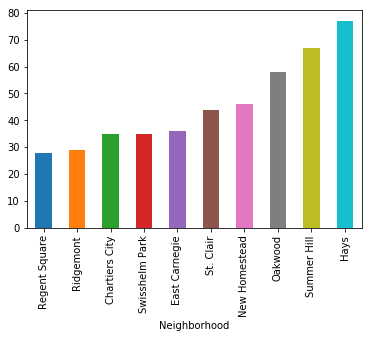

In [103]:
neighborhoods = pd.read_csv("Neighborhoods.csv")
hoodsdict = neighborhoods['hood'].value_counts().to_dict()
neighborhoods.set_index('hood')
#print(neighborhoods[neighborhoods.hood == "West End"]['sqmiles'])

fire = pd.read_csv("fire-incidents.csv")
firedict = fire['neighborhood'].value_counts().to_dict()

arrest = pd.read_csv("arrest-data.csv")
arrestdict = arrest['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

policeblotter = pd.read_csv("police-blotter.csv")
policedict = policeblotter['INCIDENTNEIGHBORHOOD'].value_counts().to_dict()

scores = hoodsdict

#this section of for loops cleans the data to make sure all of the neighborhoods have the same name for every dataset
for key in arrestdict:
    if key == 'Mt. Oliver Neighborhood':
        arrestdict['Mt. Oliver'] = arrestdict.pop(key)
        break
        
for key in arrestdict:
    if key == 'Mount Oliver':
        arrestdict['Mt. Oliver'] = arrestdict['Mt. Oliver'] + arrestdict.pop(key)
        break
        
for key in policedict:
    if key == 'Mount Oliver':
        policedict['Mt. Oliver'] = policedict.pop(key)
        
for key in policedict:
    if key == 'Central North Side':
        policedict['Central Northside'] = policedict.pop(key)

#combines single neighborhoods that were separated into one neighborhood
arrestdict['Troy Hill'] = arrestdict['Troy Hill'] + arrestdict.pop('Troy Hill-Herrs Island')
arrestdict['Central Business District'] = arrestdict['Central Business District'] + arrestdict.pop('Golden Triangle/Civic Arena')

#this section of for loops finds each instance of each neighborhood in a dataset and adds its value to the overall score
for key in firedict:
    if key in scores:
        scores[key] = scores[key] + firedict[key]
    else:
        scores[key] = firedict[key]

for key in arrestdict:
    if key in scores:
        scores[key] = scores[key] + arrestdict[key]
    else:
        scores[key] = arrestdict[key]
        
for key in policedict:
    if key in scores:
        scores[key] = scores[key] + policedict[key]
    else:
        scores[key] = policedict[key]
        
#removes 'neighborhoods' that are not actually neighborhoods in Pittsburgh
del scores['Mt. Oliver Boro']
del scores['Mount Oliver Borough']
del scores['Outside County']
del scores['Outside State']
del scores['Outside City']

s = pd.Series(scores, name="Score")
s.index.name = "Neighborhood"
s.sort_values().iloc[0:10].plot('bar') #sorts the scores by lowest first, then plots the lowest 10 onto a bar graph